In [1]:
from ruletree.tree.RuleTreeRegressor import RuleTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#initialize training data
diabetes = load_diabetes()
feature_names = diabetes.feature_names
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

You can initialize a RuleTreeRegressor similarly to sklearn Decision Trees. Analogous fit/predict function can be used

In [2]:
#initialize classifier

#prune_useless_leaves allows us to prune leaves with same prediction outcome
rtr = RuleTreeRegressor(max_depth = 3, 
                        criterion = 'squared_error',
                        prune_useless_leaves=True,
                        random_state = 42,
                        )

#fit RuleTreeClassifier
rtr.fit(X_train,y_train)

#get textual rules dictionary
rules = rtr.get_rules()

In [3]:
y_pred = rtr.predict(X_test)
print('Prediction results', y_pred[0:10])

Prediction results [180.71428571 210.98275862 180.71428571 210.98275862 100.81617647
 241.5        225.75       210.98275862 114.         160.04651163]


In [4]:
print('MSE result: ', mean_squared_error(y_test, y_pred))

MSE result:  3616.769894653006


In [5]:
#print textual rules of trained tree
rtr.print_rules(rules)

|--- X_2 <= 0.005	309
|   |--- X_8 <= 0.014	183
|   |   |--- X_5 <= 0.091	138
|   |   |    output: 100.82
|   |   |--- X_5 > 0.091
|   |   |    output: 241.5
|   |--- X_8 > 0.014
|   |   |--- X_3 <= -0.032	45
|   |   |    output: 114.0
|   |   |--- X_3 > -0.032
|   |   |    output: 180.71
|--- X_2 > 0.005
|   |--- X_2 <= 0.073	126
|   |   |--- X_3 <= 0.003	101
|   |   |    output: 160.05
|   |   |--- X_3 > 0.003
|   |   |    output: 210.98
|   |--- X_2 > 0.073
|   |   |--- X_5 <= 0.022	25
|   |   |    output: 292.47
|   |   |--- X_5 > 0.022
|   |   |    output: 225.75


In [6]:
##get global feature explanations similar to sklearn feature_importances_ of a trained Decision Tree
feture_importances = rtr.compute_feature_importances()
feture_importances

array([0.        , 0.        , 0.70266746, 0.09888023, 0.        ,
       0.06335315, 0.        , 0.        , 0.13509916, 0.        ])

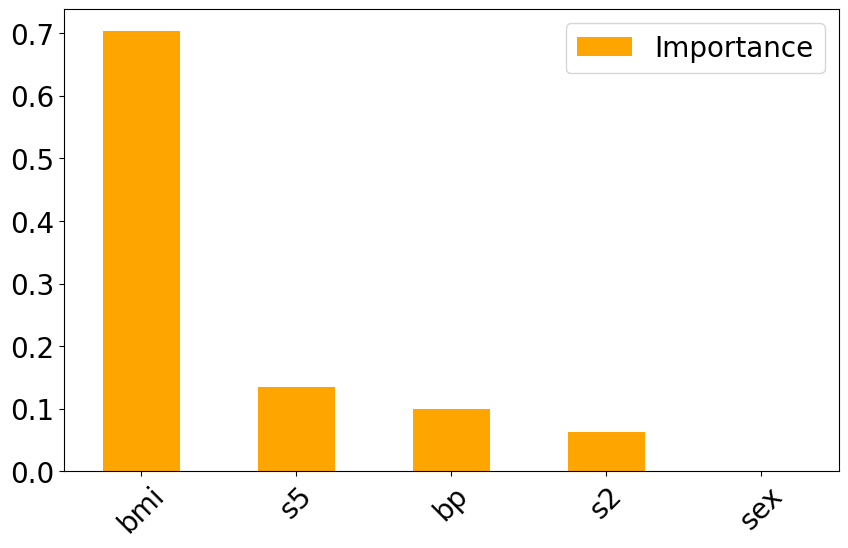

In [7]:
feat_importances = pd.DataFrame(feture_importances, index=feature_names, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.head(5).plot(kind='bar', figsize=(10,6), color = 'orange')
plt.xticks(fontsize=20, rotation = 45)          # Increase x-tick size and rotate labels
plt.yticks(fontsize=20)                       # Increase y-tick size
plt.legend(fontsize=20)  
plt.show()

In [8]:
##get local feature explanations similar to https://github.com/andosa/treeinterpreter implementation
#where prediction is the sum of bias and feature contributions:
prediction, bias, contributions = rtr.local_interpretation(X_test, joint_contribution= True)

In [9]:
print('First instance analysis')
print(f'Prediction: {prediction[0]}')
print(f'Bias: {bias[0]}')
print(f'Contributions: {contributions[0]}')

First instance analysis
Prediction: 180.71428571428572
Bias: 153.90291262135923
Contributions: {(2,): -35.54772136452863, (2, 8): 47.53369763205828, (2, 3, 8): 14.825396825396837}
